In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", context="talk")

/Users/Geri/.local/share/virtualenvs/thesis-0Scq67eD/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
gs_data = web.DataReader("GS", start="2006-01-01", end="2010-01-01", data_source="yahoo")
gs_data.head().round(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.44,124.23,126.70,128.87,6188700.0,107.58
2006-01-04,128.91,126.38,127.35,127.09,4861600.0,106.09
2006-01-05,127.32,125.61,126.00,127.04,3717400.0,106.05
2006-01-06,129.25,127.29,127.29,128.84,4319600.0,107.55
2006-01-09,130.62,128.00,128.50,130.39,4723500.0,108.84


In [3]:
# Basic selection: using timestamps
gs_2006 = gs_data[pd.Timestamp("2006-01-01"):pd.Timestamp("2006-12-31")]
print(gs_2006.head())

# Cleaner: partial string indexing
gs_2006 = gs_data.loc["2006"]
print(gs_2006.head())

                  High         Low        Open       Close     Volume  \
Date                                                                    
2006-01-03  129.440002  124.230003  126.699997  128.869995  6188700.0   
2006-01-04  128.910004  126.379997  127.349998  127.089996  4861600.0   
2006-01-05  127.320000  125.610001  126.000000  127.040001  3717400.0   
2006-01-06  129.250000  127.290001  127.290001  128.839996  4319600.0   
2006-01-09  130.619995  128.000000  128.500000  130.389999  4723500.0   

             Adj Close  
Date                    
2006-01-03  107.575417  
2006-01-04  106.089539  
2006-01-05  106.047821  
2006-01-06  107.550362  
2006-01-09  108.844261  
                  High         Low        Open       Close     Volume  \
Date                                                                    
2006-01-03  129.440002  124.230003  126.699997  128.869995  6188700.0   
2006-01-04  128.910004  126.379997  127.349998  127.089996  4861600.0   
2006-01-05  127.32000

In [4]:
# Resampling (what commonly is referred to groupby): 
# split the TS, apply a function to each group and then combine the results
gs_data.resample("5d").mean().head()
gs_data.resample("W").agg(["mean", "sum"]).head()

High                     Low                    Open  \
                  mean         sum        mean         sum        mean   
Date                                                                     
2006-01-08  128.730001  514.920006  125.877501  503.510002  126.834999   
2006-01-15  132.848001  664.240005  130.544000  652.720001  130.684000   
2006-01-22  133.672501  534.690002  131.389999  525.559998  131.907501   
2006-01-29  136.083997  680.419983  133.310001  666.550003  133.771997   
2006-02-05  142.467999  712.339996  139.937997  699.689987  140.900000   

                             Close                 Volume              \
                   sum        mean         sum       mean         sum   
Date                                                                    
2006-01-08  507.339996  127.959997  511.839989  4771825.0  19087300.0   
2006-01-15  653.419998  131.979999  659.899994  4310420.0  21552100.0   
2006-01-22  527.630005  132.555000  530.220001  4653725.0  18614900.0   
2006-01-29  668.859985  135.153998  675.769989  3968500.0  19842500.0   
2006-02-05  704.500000  141.618002  708.090012  3920120.0  19600600.0   

             Adj Close              
                  mean         sum  
Date                                
2006-01-08  106.815784  427.263138  
2006-01-15  110.171519  550.857597  
2006-01-22  110.702831  442.811325  
2006-01-29  113.032214  565.161072  
2006-02-05  118.438190  592.190948

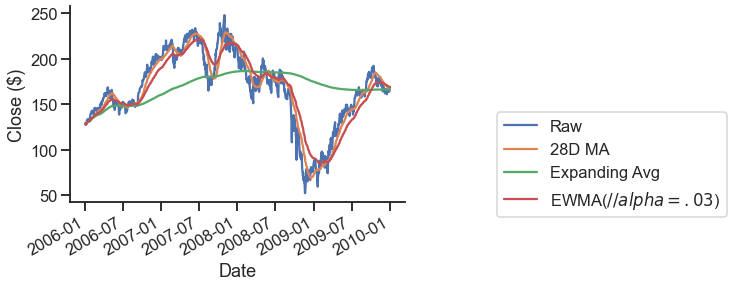

In [15]:
# Rolling, expanding and EW
gs_data.Close.plot(label="Raw") # Raw data
gs_data.Close.rolling(28).mean().plot(label="28D MA" ) # Rolling/Moving Average
gs_data.Close.expanding().mean().plot(label="Expanding Avg" )
gs_data.Close.ewm(alpha=0.03).mean().plot(label="EWMA($//alpha=.03$)" )

plt.legend(bbox_to_anchor=(1.25, .5))
plt.ylabel("Close ($)")
sns.despine()